# Influence lines statically indeterminate structure #

In [1]:
import sympy as sp

In [2]:
Bv = sp.symbols('Bv')
a = sp.symbols('a')
C1, C2, C3, C4 = sp.symbols('C1, C2, C3, C4')
x = sp.symbols('x')

In [3]:
EI = 5000
L1 = 5
L2 = 5

In [4]:
#q = -Bv * sp.DiracDelta(x-L1) + 1 * sp.DiracDelta(x-a)
q = -Bv * sp.SingularityFunction(x,L1,-1) + 1 * sp.SingularityFunction(x,a,-1)

In [5]:
V = -sp.integrate(q,x)+C1
M = sp.integrate(V,x)+C2
kappa = M / EI
phi = sp.integrate(kappa,x)+C3
w = -sp.integrate(phi,x)+C4
display(w)

-Bv*SingularityFunction(x, 5, 3)/30000 - C1*x**3/30000 - C2*x**2/10000 - C3*x + C4 + SingularityFunction(x, a, 3)/30000

In [6]:
eq1 = sp.Eq(w.subs(x,0),0)
eq2 = sp.Eq(w.subs(x,L1+L2),0)
eq3 = sp.Eq(M.subs(x,0),0)
eq4 = sp.Eq(M.subs(x,L1+L2),0)
sol = sp.solve([eq1,eq2,eq3,eq4],[C1,C2,C3,C4])
w_sol = w.subs(sol).rewrite(sp.Piecewise)
w_halfway = w_sol.subs(x,L1).simplify()
display(w_halfway)

Piecewise((-Bv/240, a < 0), ((-250*Bv - a**3 + 75*a)/60000, a < 5), ((-250*Bv - 75*a + (a - 10)**3 + 750)/60000, a < 10), (-Bv/240, True))

In [7]:
Bv_1 = sp.solve(sp.Eq(w_halfway.args[1][0],0),Bv)[0]
display(Bv_1)
Bv_2 = sp.solve(sp.Eq(w_halfway.args[2][0],0),Bv)[0]
display(Bv_2)

a*(75 - a**2)/250

-3*a/10 + (a - 10)**3/250 + 3

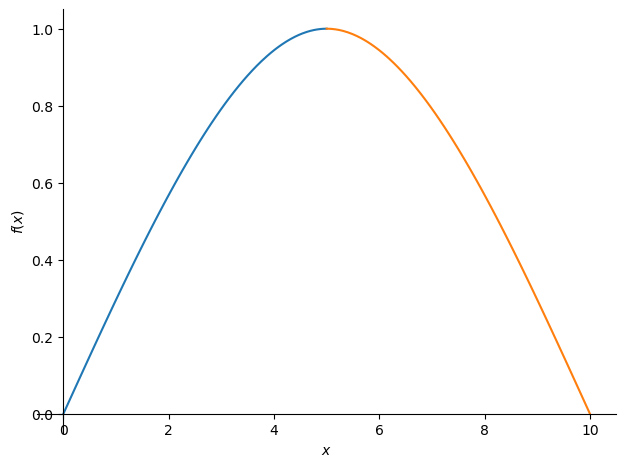

In [8]:
sp.plot((Bv_1,(a,0,5)),(Bv_2,(a,5,10)));